In [1]:
import os
import numpy as np
from keras.preprocessing import image
import cv2
import dlib

print(os.path.abspath(os.curdir))

Using TensorFlow backend.


C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927


In [3]:
os.chdir('./AMLS_19-20_SN16072927')
print(os.path.abspath(os.curdir))

C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927


In [4]:
basedir = './Datasets'
images_dir = os.path.join(basedir, 'img_celeba')
labels_filename = 'labels_celeba.csv'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

def run_dlib_shape(image):
    # in this function we load the image, detect the landmarks of the face, and then return the image and the landmarks
    # load the input image, resize it, and convert it to grayscale
    resized_image = image.astype('uint8')

    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    gray = gray.astype('uint8')

    # detect faces in the grayscale image
    rects = detector(gray, 1)
    num_faces = len(rects)

    if num_faces == 0:
        return None, resized_image

    face_areas = np.zeros((1, num_faces))
    face_shapes = np.zeros((136, num_faces), dtype=np.int64)

    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        temp_shape = predictor(gray, rect)
        temp_shape = shape_to_np(temp_shape)

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)],
        #   (x, y, w, h) = face_utils.rect_to_bb(rect)
        (x, y, w, h) = rect_to_bb(rect)
        face_shapes[:, i] = np.reshape(temp_shape, [136])
        face_areas[0, i] = w * h
    # find largest face and keep
    dlibout = np.reshape(np.transpose(face_shapes[:, np.argmax(face_areas)]), [68, 2])

    return dlibout, resized_image

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((shape.num_parts, 2), dtype=dtype)

    # loop over all facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, shape.num_parts):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords

def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def extract_features_labels():
    """
    This funtion extracts the landmarks features for all images in the folder 'dataset/celeba'.
    It also extracts the gender label for each image.
    :return:
        landmark_features:  an array containing 68 landmark points for each image in which a face was detected
        gender_labels:      an array containing the gender label (male=1 and female=0) for each image in
                            which a face was detected
    """
    image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)]
    target_size = None
    labels_file = open(os.path.join(basedir, labels_filename), 'r')
    lines = labels_file.readlines()
    gender_labels = {line.split('\t')[0] : int(line.split('\t')[2]) for line in lines[1:]}
    # all_features = None
    # all_labels = None
    if os.path.isdir(images_dir):
        all_features = []
        all_labels = []
        gambar_error = []
        for img_path in image_paths:
            file_name = img_path.split('.')[1].split('\\')[-1]

            # load image
            img = image.img_to_array(
                image.load_img(img_path,
                               target_size=target_size,
                               interpolation='bicubic'))
            features, _ = run_dlib_shape(img)
            if features is not None:
                all_features.append(features)
                all_labels.append(gender_labels[file_name])
            if features is None:
                gambar_error.append(file_name)

    landmark_features = np.array(all_features)
    gender_labels = (np.array(all_labels) + 1)/2 # simply converts the -1 into 0, so male=1 and female=0
    return landmark_features, gender_labels, gambar_error

x1, x2, x3 = extract_features_labels()


In [5]:
print(len(x3))
print(x3)

197
['1015', '1045', '1109', '1119', '1153', '1162', '1183', '119', '123', '1254', '1297', '1305', '1337', '1343', '136', '137', '1400', '143', '1468', '1479', '148', '149', '1505', '1522', '153', '1558', '158', '1602', '1605', '1641', '165', '1651', '1666', '1676', '1703', '1793', '187', '1877', '1939', '1945', '1956', '198', '1994', '1997', '2', '2012', '2013', '2040', '2054', '2060', '2110', '2145', '219', '2201', '2213', '223', '2248', '2261', '2267', '2285', '2294', '2314', '2344', '2345', '2347', '239', '2416', '2447', '2480', '2486', '2512', '2582', '2605', '2622', '2631', '2696', '2728', '2828', '2851', '2919', '292', '2961', '2971', '2975', '3', '3012', '3048', '3054', '3107', '3130', '3135', '3142', '315', '3168', '3171', '3197', '3199', '3211', '3252', '3291', '330', '3319', '3382', '3399', '3454', '3492', '35', '3514', '3564', '3569', '3625', '3626', '3639', '365', '3650', '3731', '3757', '3785', '3823', '3824', '3853', '3865', '3907', '3927', '3945', '4006', '4009', '4043'

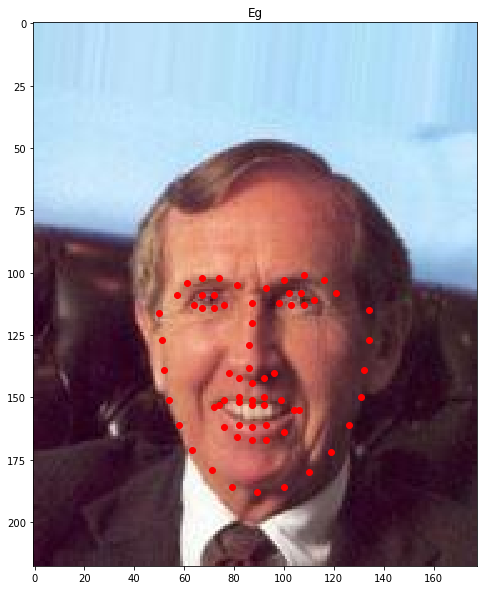

In [14]:
import cv2
import matplotlib.pyplot as plt

basedir = './Datasets'
images_dir = os.path.join(basedir, 'img_celeba')
ex_img_path = os.path.join(images_dir, '20.jpg')
ex_img = image.img_to_array(image.load_img(ex_img_path, target_size = None, interpolation='bicubic'))
ex_feat, _ = run_dlib_shape(ex_img)


x, y = np.split(ex_feat, 2, axis=1)
cv_image = cv2.imread(ex_img_path)
fig = plt.figure(figsize=(10, 10))
image_plot = plt.imshow(cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB))
plt.title("Eg")
plt.scatter(x, y, c='red')
plt.show()